In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

## IFO spherical power budget after increase power ##

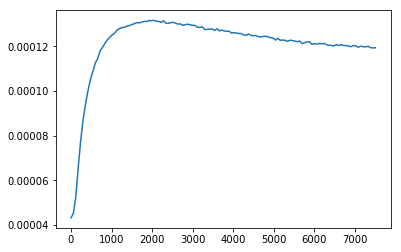

In [4]:
#Load the ITMY Hartmann data
datay = np.loadtxt('/Users/daniel_vander-hyde/Documents/lab_folder/hanford_journal/2018_12/12_07_2018/ifo_thermal_response_12_07_2018/ITMY_HWS.dat')
#datax = np.loadtxt('../12_07_2018/ifo_thermal_response_12_07_2018/ITMX_HWS.dat')

t = np.arange(0,len(datay[:-1,0]),1)*60
HWSY = datay[:-1,1]
#HWSX = datax[:-1,1]
xn = HWSY
plt.plot(t,HWSY)
#plt.plot(t,HWSX)
plt.show()

In [5]:
b, a = signal.butter(2, 0.2)
#c,d = signal.butter(4,.06)

In [6]:
#y = signal.filtfilt(c, d, HWSX)
y2 = signal.filtfilt(b, a, HWSY)

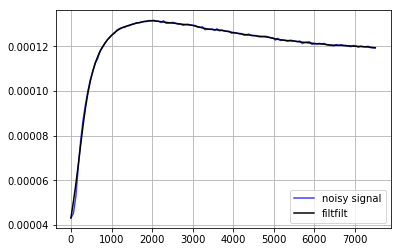

In [7]:
plt.figure
plt.plot(t, HWSY, 'b', alpha=0.75)
plt.plot(t, y2, 'k')
#plt.plot(t, z, 'r--', t, z2, 'r', t, y2, 'k')
plt.legend(('noisy signal',
             'filtfilt'), loc='best')
#plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
#             'filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [8]:
#plt.figure
#plt.plot(t,HWSX,'g', alpha=.75)
#plt.plot(t,y,'k')
#plt.grid(True)
#plt.show()

In [9]:
## Exponential fit of the CO2 step response
def CO2_step_response(x, amp):
    return ((5.62470866284e-05*np.exp(-0.000385644690824 * x) + -6.92417487498e-07)*(amp/.95))

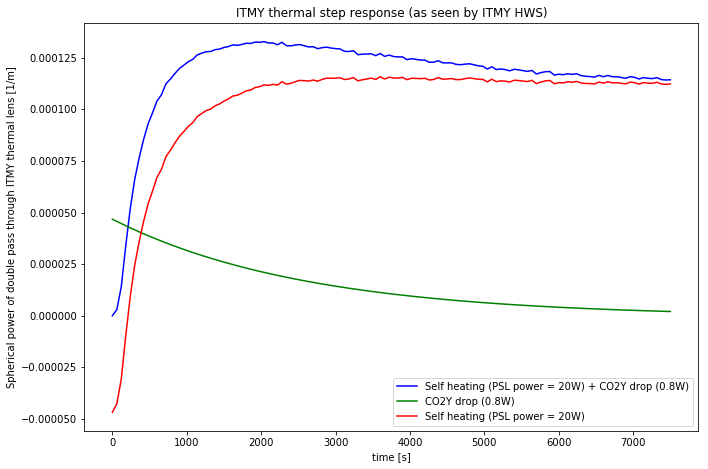

In [10]:
HWSY = datay[:-1,1]
CO2Y_power = .8
CO2Y_drop = CO2_step_response(t,CO2Y_power)
diff = (HWSY-min(HWSY))*(3/2)-CO2Y_drop
plt.figure(figsize=(11,7.5))
plt.plot(t, (HWSY-min(HWSY))*(3/2),'b',t, CO2Y_drop,'g', t,diff,'r')
plt.title('ITMY thermal step response (as seen by ITMY HWS)')
plt.legend(('Self heating (PSL power = 20W) + CO2Y drop ({}W)'.format(CO2Y_power),'CO2Y drop ({}W)'.format(CO2Y_power),'Self heating (PSL power = 20W)'), loc='best')
plt.ylabel('Spherical power of double pass through ITMY thermal lens [1/m]')
plt.xlabel('time [s]')
plt.savefig('ITMY_thermal_response.png')
plt.show()

file = open('ITMY_during_increase_power.txt','w')
file.write('time (seconds) , Total ITMY thermal response (diopters) , CO2Y drop (diopters) , ITMY self heating (diopters) \n')
for i in range(len(t)): 
    file.write(str(t[i]) + "," + str(HWSY[i]-min(HWSY)) + "," + str(CO2Y_drop[i]) + "," + str(diff[i] + abs(min(diff)))  + "\n")
file.close()

In [11]:
a = np.loadtxt('ITMY_during_increase_power.txt', delimiter=",", skiprows=1) 
plt.show()

In [12]:
def only_pos(arr): 
    return [x for x in arr if x>0]

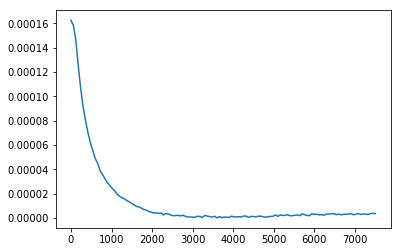

In [13]:

#Flip the curve that we think is only the self heating of ITMY


flip = -1*(diff + abs(min(diff)))
inv_diff = flip- min(flip)

plt.plot(t, inv_diff)
plt.show()

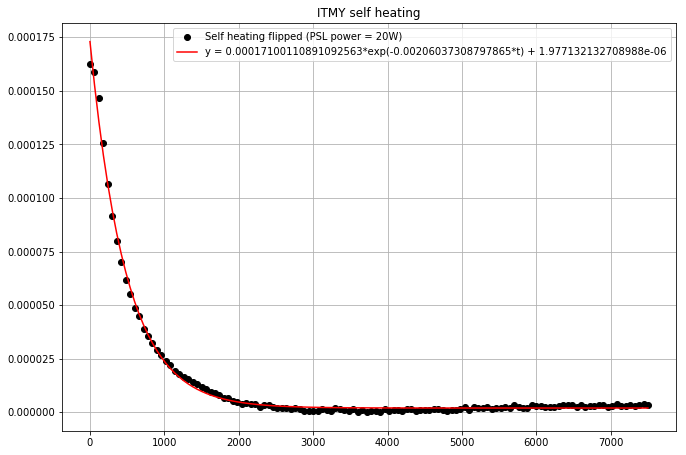

0.000171001108911
0.00206037308798
1.97713213271e-06


In [14]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

p_guess = [max(inv_diff), .001, 0]

popt2, pcov2 = curve_fit(func, t, inv_diff, p_guess )

plt.figure(figsize=(11,7.5))
plt.plot(t, inv_diff, 'ko', label="Self heating flipped (PSL power = 20W)")
plt.plot(t, func(t, *popt2), 'r-', label='y = {}*exp(-{}*t) + {}'.format(popt2[0], popt2[1], popt2[2]))
plt.title('ITMY self heating')
plt.grid(True)
plt.legend()
plt.show()

print(popt2[0])
print(popt2[1])
print(popt2[2])


In [1]:
## Estimate absorption (assume: thermal lens is proportional to the absorbed power)
## Use comsol model, then fit coefficients to estimate absorbed power

t_comsol = t[:len(datay[:,0])]

def comsol_func(x, a, b): 
    datain = np.loadtxt('1W_self_heating_defocus_doublepass.txt', skiprows=1)
    y2 = interp1d(datain[:,0]*60*60, datain[:,1], kind='cubic')
    return (a - y2(x)*b)

popt3, pcov3 = curve_fit(comsol_func, t_comsol[1:], inv_diff[:len(t_comsol[1:])])

print(popt3)

plt.plot(t_comsol, inv_diff[:len(t_comsol)], t_comsol, comsol_func(t_comsol, *popt3))

PRG = 47.0
PSL_power = 20.0
arm_gain = 275.0

plt.show()

Pcirc = PRG*arm_gain*PSL_power*.5 


NameError: name 't' is not defined

In [ ]:
plt.savefig('ITMY_self_heating.png')
plt.savefig('ITMY_thermal_response.png')